In [2]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
import seaborn as sns

In [3]:
df = pd.read_csv("data/dow_jones_index.data", sep=',')
print(df.shape)
print(df.head(5))

(750, 16)
   quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [5]:
df.isna().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [6]:
df['stock'] = df['stock'].astype('category')
df['date'] = pd.to_datetime(df['date'])

currency_features = df.select_dtypes(include=['object']).columns
df[currency_features] = df[currency_features].replace('[\$,]', '', regex=True).astype(float)

print(df.dtypes)

quarter                                        int64
stock                                       category
date                                  datetime64[ns]
open                                         float64
high                                         float64
low                                          float64
close                                        float64
volume                                         int64
percent_change_price                         float64
percent_change_volume_over_last_wk           float64
previous_weeks_volume                        float64
next_weeks_open                              float64
next_weeks_close                             float64
percent_change_next_weeks_price              float64
days_to_next_dividend                          int64
percent_return_next_dividend                 float64
dtype: object


In [6]:
df.describe().T.apply(lambda s: s.apply('{0:.3f}'.format))

count           mean            std  \
quarter                             750.000          1.520          0.500   
open                                750.000         53.652         32.639   
high                                750.000         54.670         33.216   
low                                 750.000         52.640         32.119   
close                               750.000         53.729         32.789   
volume                              750.000  117547801.407  158438089.361   
percent_change_price                750.000          0.050          2.518   
percent_change_volume_over_last_wk  720.000          5.594         40.543   
previous_weeks_volume               720.000  117387644.835  159232227.996   
next_weeks_open                     750.000         53.702         32.778   
next_weeks_close                    750.000         53.889         33.017   
percent_change_next_weeks_price     750.000          0.238          2.680   
days_to_next_dividend               750.000         52.525         46.335   
percent_return_next_dividend        750.000          0.692          0.305   

                                            min           25%           50%  \
quarter                                   1.000         1.000         2.000   
open                                     10.590        29.830        45.970   
high                                     10.940        30.627        46.885   
low                                      10.400        28.720        44.800   
close                                    10.520        30.365        45.930   
volume                              9718851.000  30866243.250  53060885.000   
percent_change_price                    -15.423        -1.288         0.000   
percent_change_volume_over_last_wk      -61.433       -19.804         0.513   
previous_weeks_volume               9718851.000  30678320.000  52945558.000   
next_weeks_open                          10.520        30.315        46.015   
next_weeks_close                         10.520        30.463        46.125   
percent_change_next_weeks_price         -15.423        -1.222         0.101   
days_to_next_dividend                     0.000        24.000        47.000   
percent_return_next_dividend              0.066         0.535         0.681   

                                              75%             max  
quarter                                     2.000           2.000  
open                                       72.715         172.110  
high                                       74.288         173.540  
low                                        71.037         167.820  
close                                      72.667         170.580  
volume                              132721823.750  1453438639.000  
percent_change_price                        1.651           9.882  
percent_change_volume_over_last_wk         21.801         327.409  
previous_weeks_volume               133322975.250  1453438639.000  
next_weeks_open                            72.715         172.110  
next_weeks_close                           72.915         174.540  
percent_change_next_weeks_price             1.846           9.882  
days_to_next_dividend                      69.000         336.000  
percent_return_next_dividend                0.854           1.564

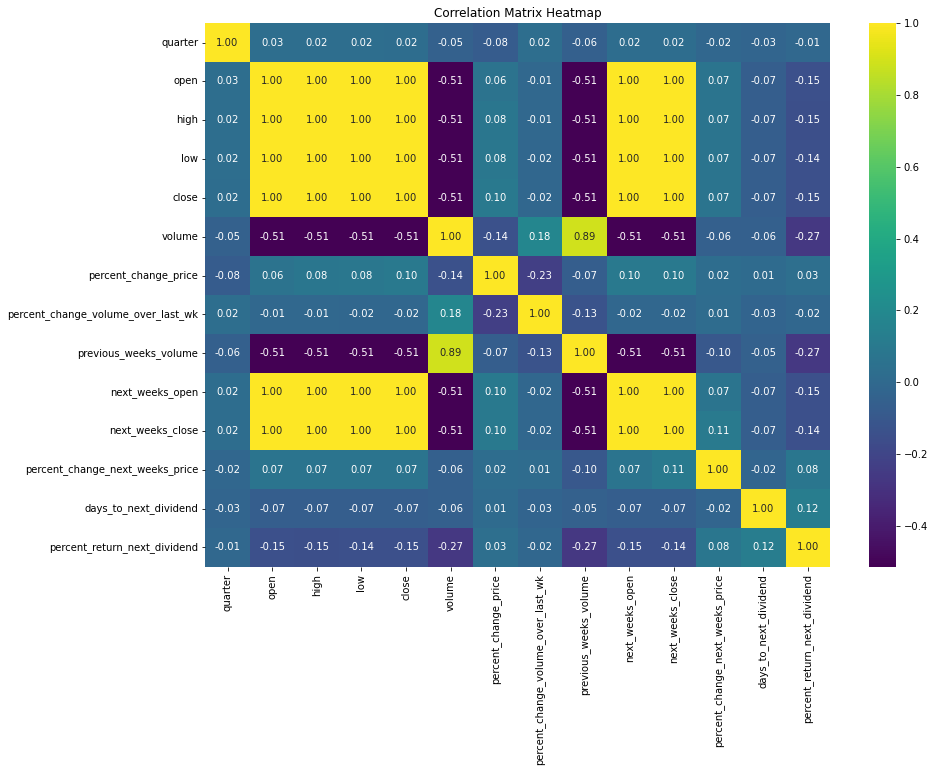

In [7]:
# Select the specified columns
def correlation_matrix(df):
    columns_of_interest = df.select_dtypes(include=[np.number]).columns
    df_selected = df[columns_of_interest]

    # Calculate the correlation matrix
    correlation_matrix = df_selected.corr(method = 'pearson')

    # Configure the size of the figure
    plt.figure(figsize=(14, 10))

    # Correlation heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

correlation_matrix(df)

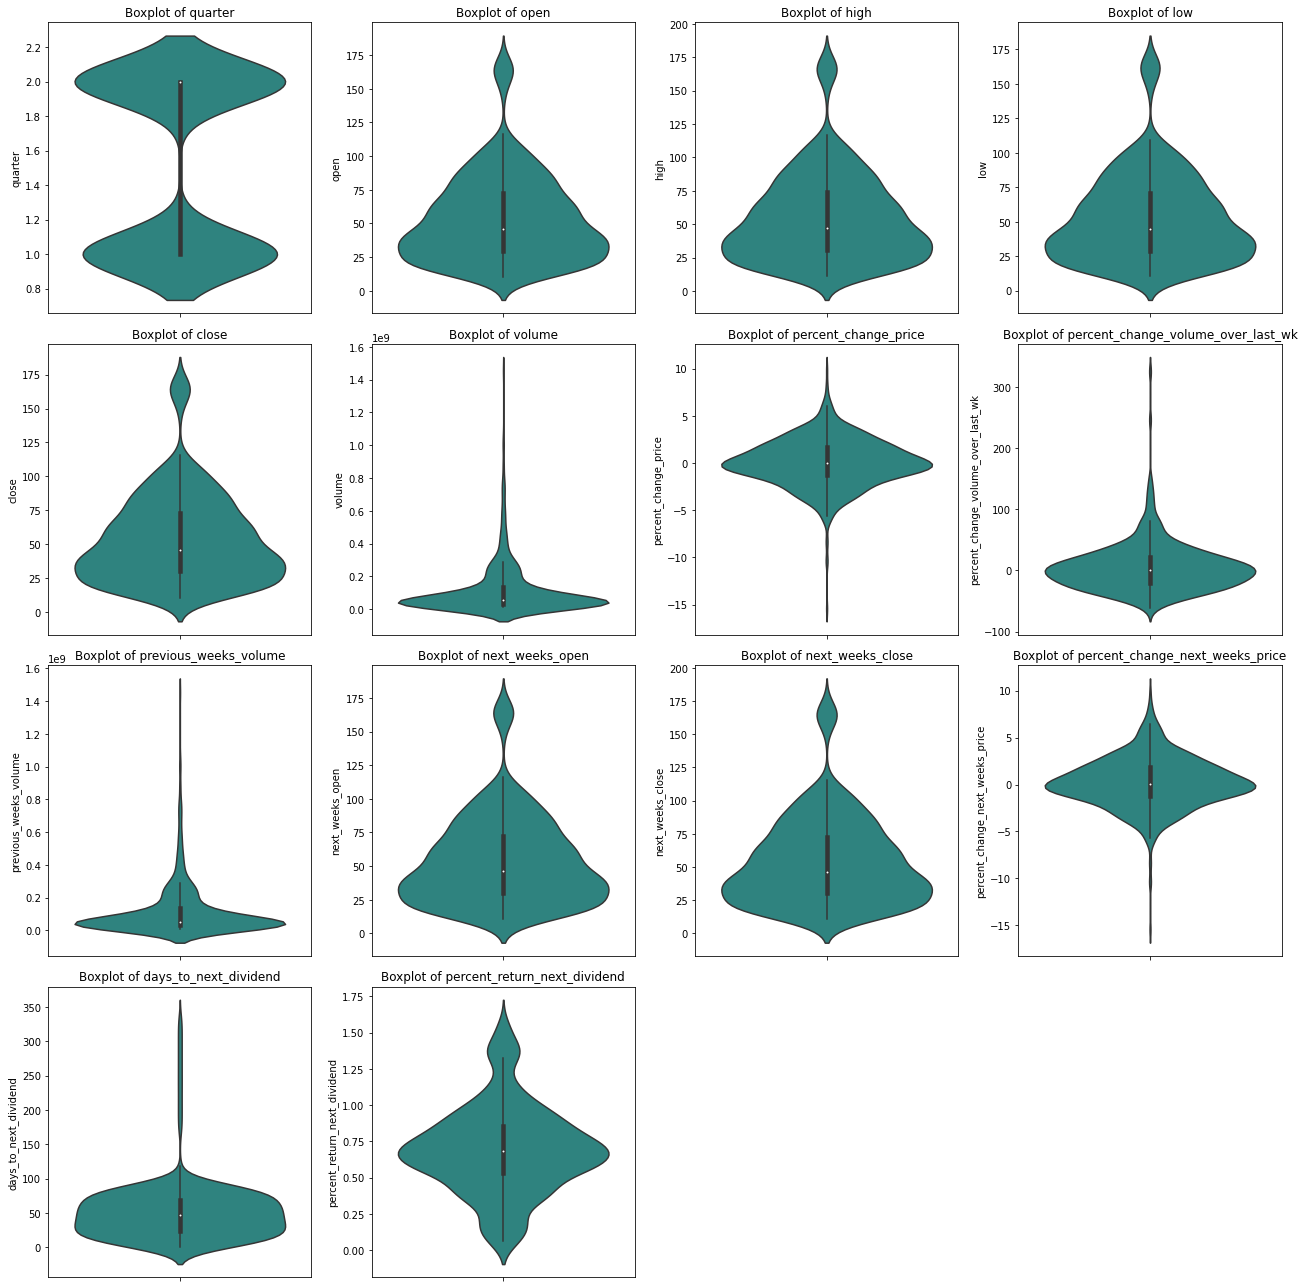

In [9]:
# Configure the size of the figure
columns_of_interest = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(18, 18))

# Loop to create boxplots for each numeric column
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(data=df, y=column, palette='viridis')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.grid(False)
plt.show()

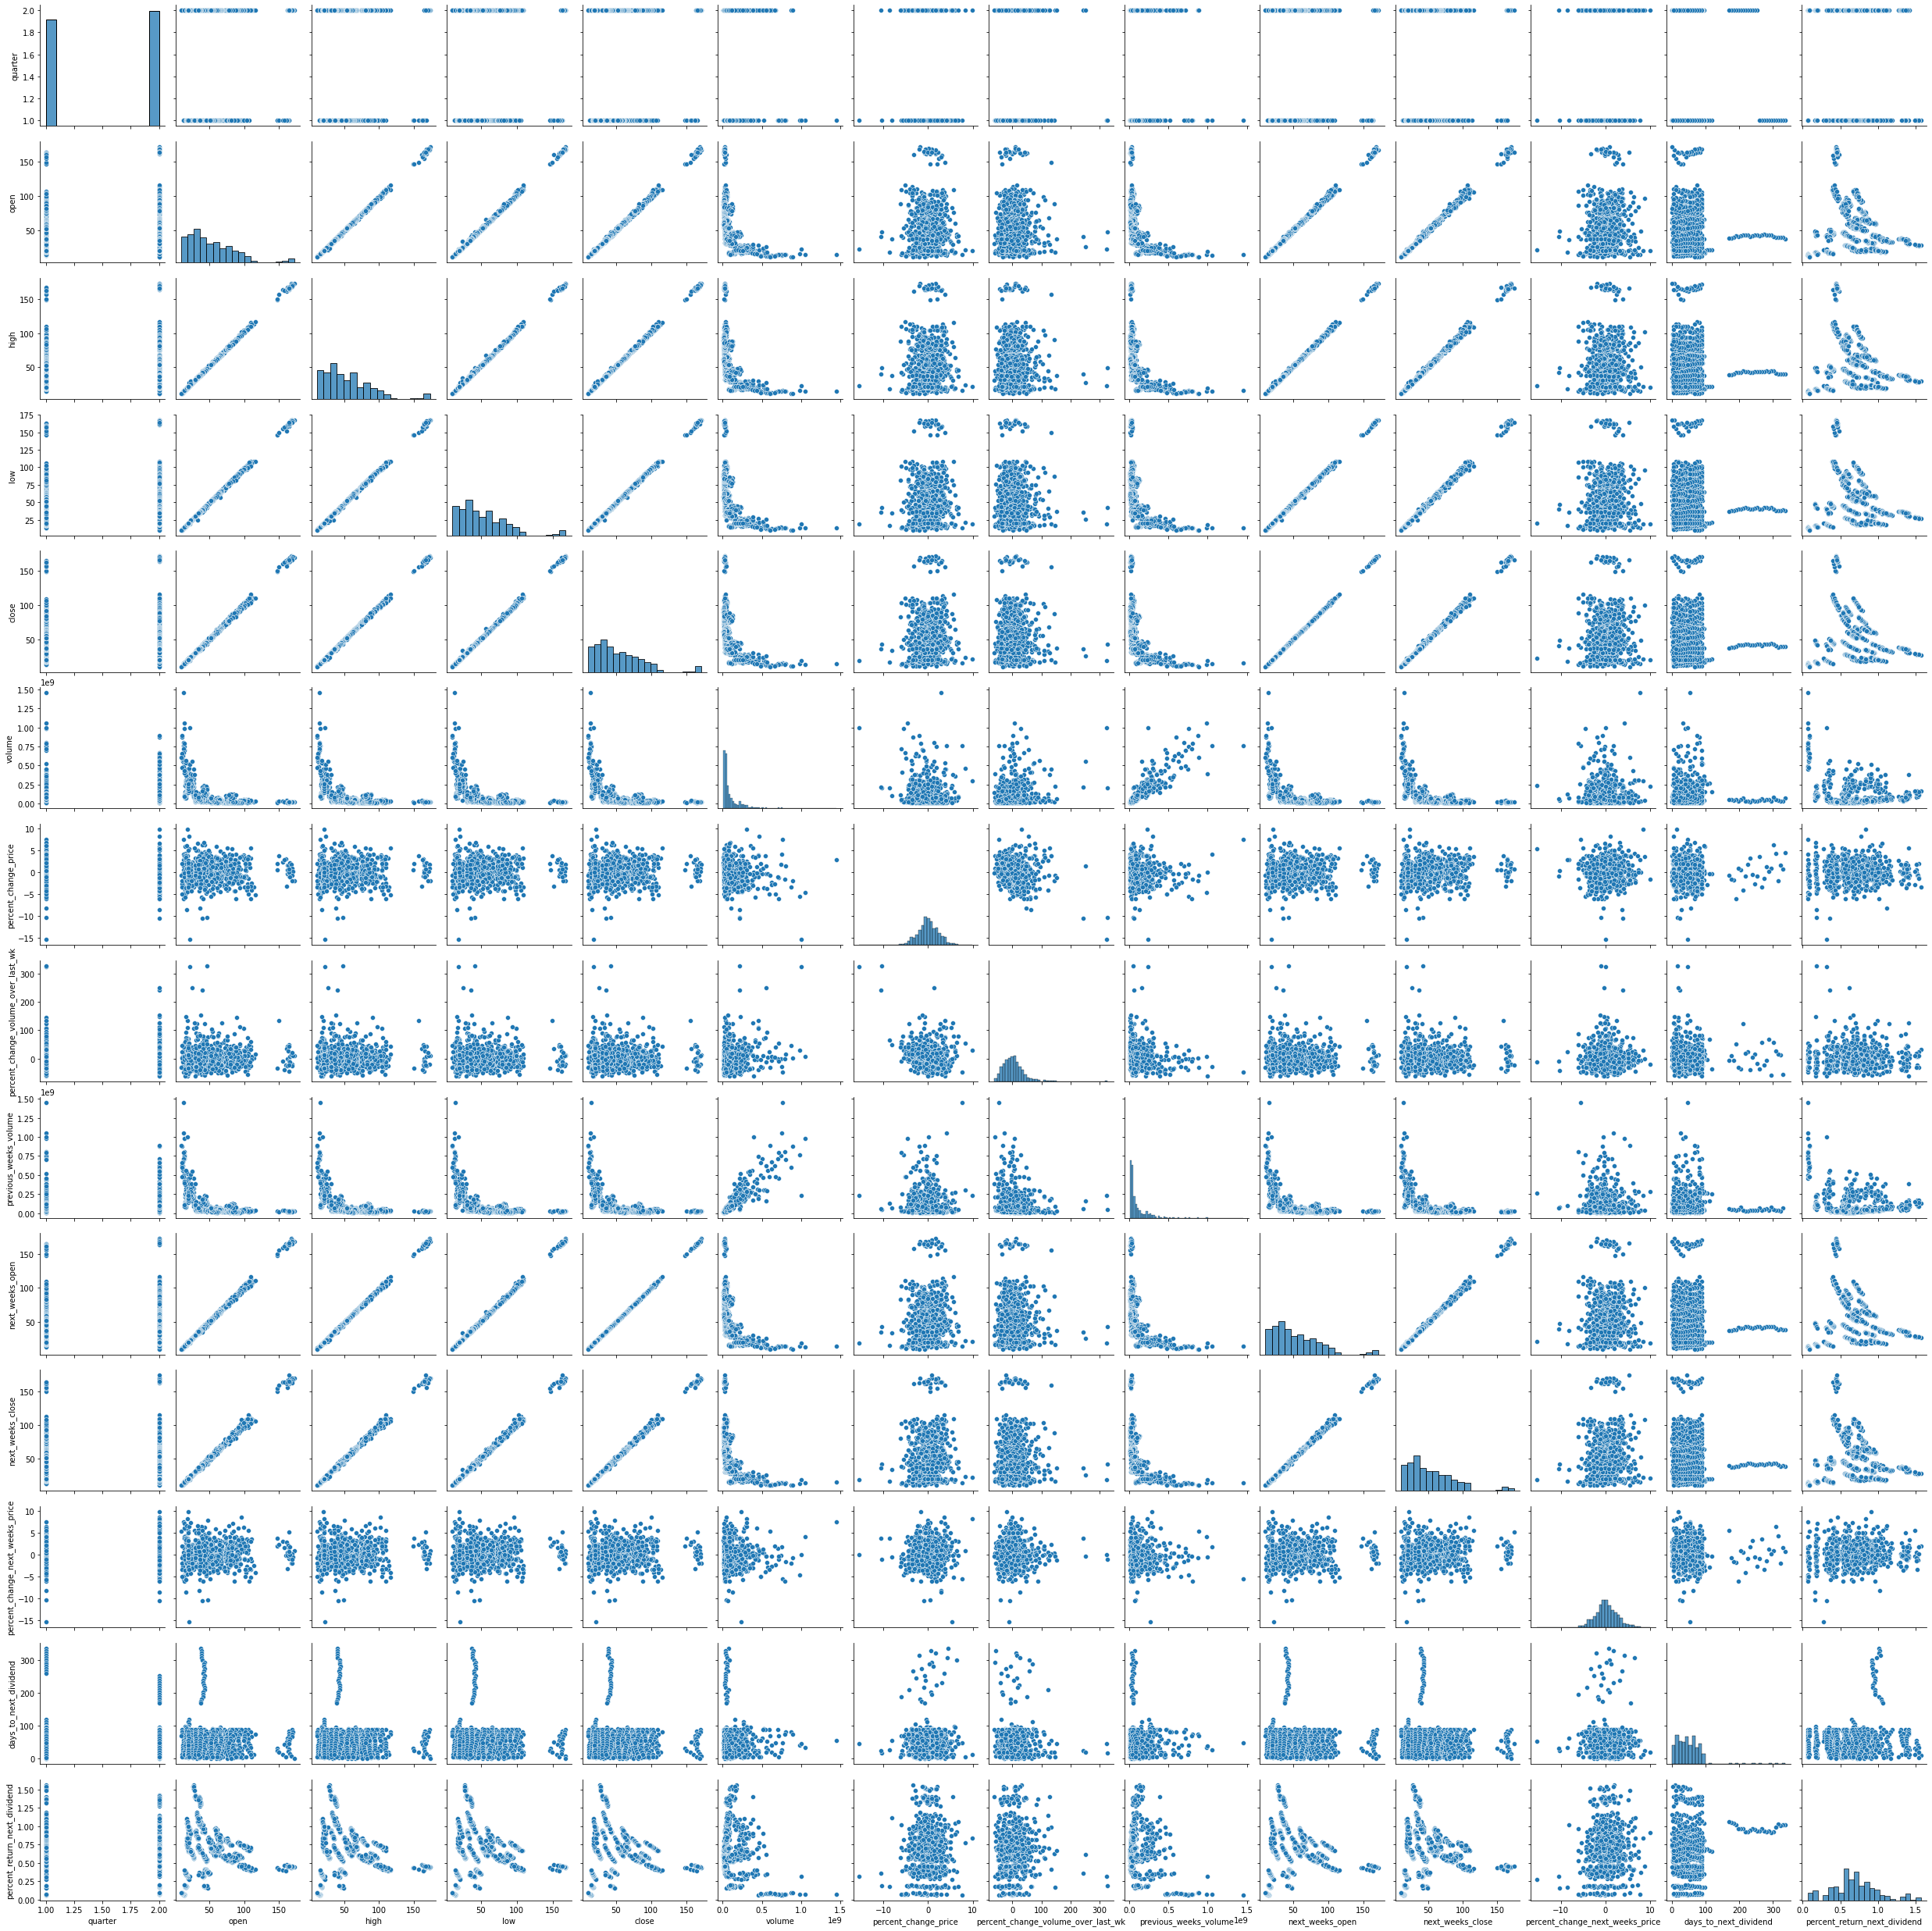

In [10]:
sns.pairplot(df)
plt.show()

<Figure size 1080x864 with 0 Axes>

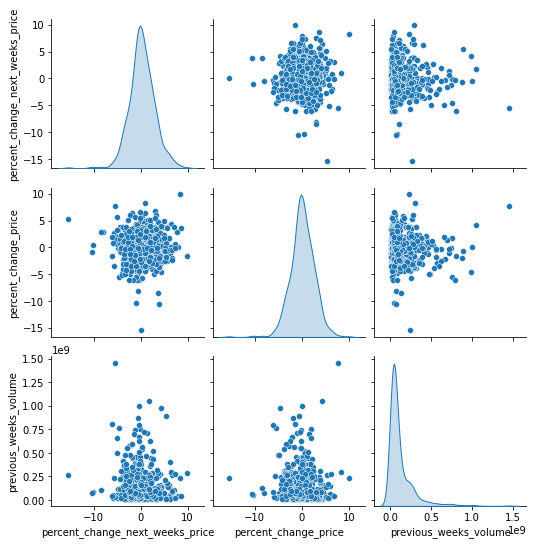

In [77]:
# Define the viridis colormap
viridis_palette = sns.color_palette("viridis", as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a pair plot with the viridis colormap
pair_plot = sns.pairplot(df[['percent_change_next_weeks_price', 'percent_change_price', 'previous_weeks_volume']], 
                         diag_kind='kde', 
                         markers='o',
                         palette=viridis_palette)


C:\Users\p059043\AppData\Local\Temp/ipykernel_19160/1154422170.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineplot.set_xticklabels(df['date'],rotation=45)


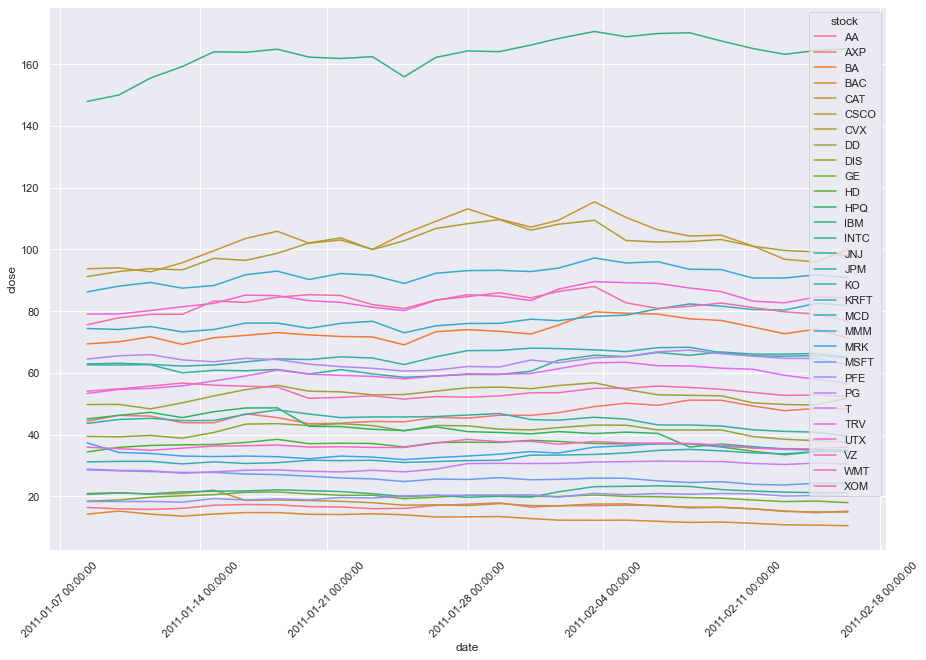

In [90]:
sns.set(rc={'figure.figsize':(15, 10)})

lineplot = sns.lineplot(data=df, x='date', y='close', hue='stock')

lineplot.set_xticklabels(df['date'],rotation=45)

plt.show()

C:\Users\p059043\AppData\Local\Temp/ipykernel_19160/661022997.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineplot.set_xticklabels(df['date'],rotation=45)


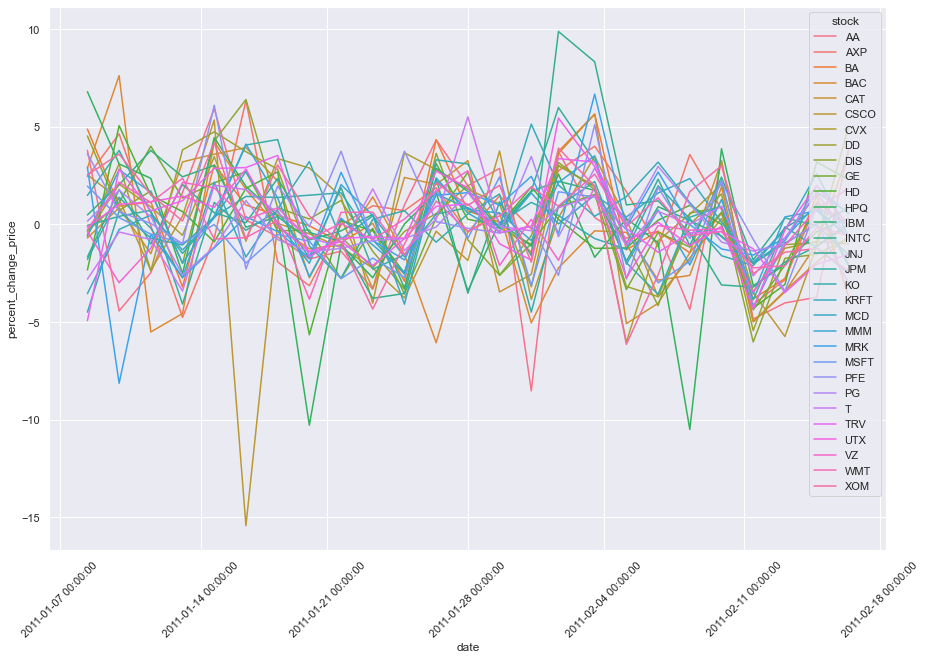

In [91]:
sns.set(rc={'figure.figsize':(15, 10)})

lineplot = sns.lineplot(data=df, x='date', y='percent_change_price', hue='stock')

lineplot.set_xticklabels(df['date'],rotation=45)

plt.show()

Text(0, 0.5, 'Closing Price')

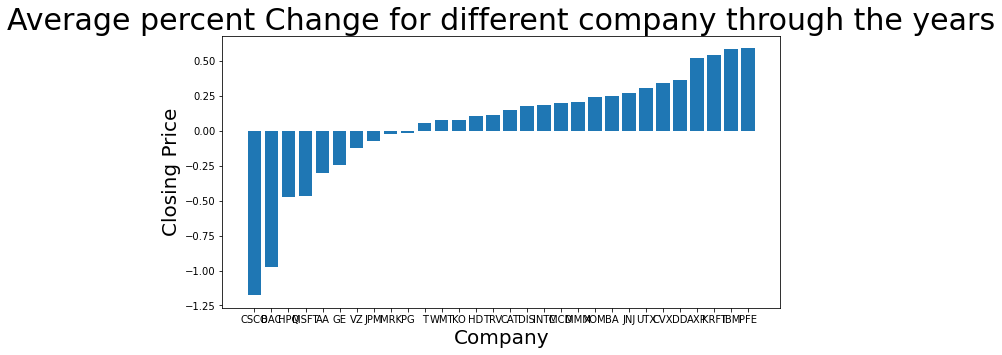

In [11]:
#Average Closing Price for different company through the years
Avg_change_pd = df.groupby('stock')['percent_change_price'].mean().to_frame()
Avg_change_pd.reset_index(level = 0, inplace = True)
Avg_change_pd = Avg_change_pd.sort_values('percent_change_price')

fig, ax = plt.subplots(figsize=(10, 5))

plt.bar(Avg_change_pd['stock'], Avg_change_pd['percent_change_price'])

plt.title("Average percent Change for different company through the years",fontsize=30)
plt.xlabel("Company",fontsize=20)
plt.ylabel("Closing Price",fontsize=20)

Step 4: Feature Engineering
Go beyond basic features. Consider including:

Rolling averages: Capture trends.
Volatility: High-Low range, useful to determine risk.
Lagged features: For time series analysis.

In [7]:
# Calculate weekly return and volatility (high-low spread)
df['weekly_return'] = (df['close'] - df['open']) / df['open']
df['volatility'] = df['high'] - df['low']

# Rolling average features for smoothing fluctuations
df['rolling_avg_3w'] = df['close'].rolling(window=3).mean()
df['rolling_vol_3w'] = df['volatility'].rolling(window=3).mean()
df['ma_7'] = df.groupby('stock')['close'].rolling(window=7).mean().reset_index(0, drop=True)
df['ma_3'] = df.groupby('stock')['close'].rolling(window=3).mean().reset_index(0, drop=True)

# Create lag features (e.g., previous week's percent change)
df['lag_1'] = df.groupby('stock')['percent_change_price'].shift(1)
df['lag_2'] = df.groupby('stock')['percent_change_price'].shift(2)

3. Modeling
Approach: Use both classification and regression models with advanced techniques like time series forecasting, which neither candidate implemented. Try models like XGBoost and Prophet for time series, or even LSTMs for capturing temporal dependencies.

Improvement: Consider different feature selection techniques and hyperparameter tuning for better model performance.

In [24]:
df['best_stock'] = df.groupby('date')['percent_change_next_weeks_price'].transform(lambda x: (x == x.max()).astype(int))

# Now each row has 'best_stock' column where 1 indicates the best-performing stock for that week
print(df[['stock', 'date', 'percent_change_next_weeks_price', 'best_stock']].head())

  stock       date  percent_change_next_weeks_price  best_stock
0    AA 2011-01-07                        -4.428490           0
1    AA 2011-01-14                        -2.470660           0
2    AA 2011-01-21                         1.638310           0
3    AA 2011-01-28                         5.933250           0
4    AA 2011-02-04                         0.230814           0


In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
features_with_date = ['date','stock','open', 'high', 'low', 'close', 'volume', 'percent_change_price', 
            'percent_change_volume_over_last_wk', 'previous_weeks_volume', 
            'days_to_next_dividend', 'percent_return_next_dividend','weekly_return', 'volatility', 'rolling_avg_3w', 'rolling_vol_3w', 'ma_7', 'ma_3', 'lag_1', 'lag_2']

target = 'best_stock'

df1 = df.copy()
df1 = df1.dropna()
print(df1.shape)

X = df1[features_with_date]
y = df1[target]

# Split into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Train-test split based on time (e.g., first 80% for training, last 20% for testing)
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

X_train = train_data[features_with_date]
y_train = train_data['best_stock']
X_test = test_data[features_with_date]
y_test = test_data['best_stock']


features = ['percent_change_price', 'percent_change_volume_over_last_wk', 
            'previous_weeks_volume', 'days_to_next_dividend', 
            'percent_return_next_dividend', 'weekly_return', 'volatility', 'rolling_avg_3w', 'rolling_vol_3w', 'ma_7',  'ma_3', 'lag_1', 'lag_2']

#smote = SMOTE(random_state=2)
#X_train_smote, y_train_smote = smote.fit_resample(X_train[features], y_train)


# Train XGBoost model
model = XGBClassifier(scale_pos_weight = 0.1)
model.fit(X_train[features], y_train)

# Evaluate performance
y_pred = model.predict(X_test[features])
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

(570, 25)
[15:14:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       0.00      0.00      0.00         2

    accuracy                           0.99       150
   macro avg       0.49      0.50      0.50       150
weighted avg       0.97      0.99      0.98       150



c:\Users\p059043\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\p059043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\p059043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

In [34]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Calculate cumulative return if you invested 100€ each week in the predicted stock
data_test = X_test.copy()  # Copy test data
data_test['predicted_best_stock'] = y_pred

# Merge with the original data to get the actual returns for each predicted stock
data_test = data_test.merge(df[['date', 'stock', 'percent_change_next_weeks_price']], on=['date','stock'], how='left')

# Assuming 100€ investment each week
data_test['predicted_return'] = data_test['percent_change_next_weeks_price'] * 100 / 100
cumulative_return = data_test[data_test['predicted_best_stock']==1]['predicted_return'].sum()
print(f'Cumulative Return: {cumulative_return} EUR')

Accuracy: 0.9866666666666667
Precision: 0.0
Recall: 0.0
Cumulative Return: 0.0 EUR


c:\Users\p059043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
data_test[data_test['predicted_best_stock']==1]

Empty DataFrame
Columns: [date, stock, open, high, low, close, volume, percent_change_price, percent_change_volume_over_last_wk, previous_weeks_volume, days_to_next_dividend, percent_return_next_dividend, weekly_return, volatility, rolling_avg_3w, rolling_vol_3w, ma_7, ma_3, lag_1, lag_2, predicted_best_stock, percent_change_next_weeks_price, predicted_return]
Index: []

[0 rows x 23 columns]

In [ ]:
from fbprophet import Prophet

# Prepare data for Prophet model
df_prophet = df[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# Define and train Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Predict future stock prices
future = model_prophet.make_future_dataframe(periods=12, freq='W')
forecast = model_prophet.predict(future)

model_prophet.plot(forecast)

In [21]:
from sklearn.metrics import f1_score

# Custom evaluation for best stock prediction
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.00


4. Evaluation and Tuning
Metrics: While accuracy is important, use additional metrics such as F1 score or a custom metric reflecting return on investment. Evaluate if your predictions result in higher cumulative returns than previous approaches.

In [37]:
from sklearn.ensemble import VotingClassifier

# Combine different models
voting_clf = VotingClassifier(estimators=[
    ('xgb', XGBClassifier()), 
    ('rf', RandomForestClassifier()), 
    ('logreg', LogisticRegression())
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print(f'Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting):.2f}')

NameError: name 'RandomForestClassifier' is not defined

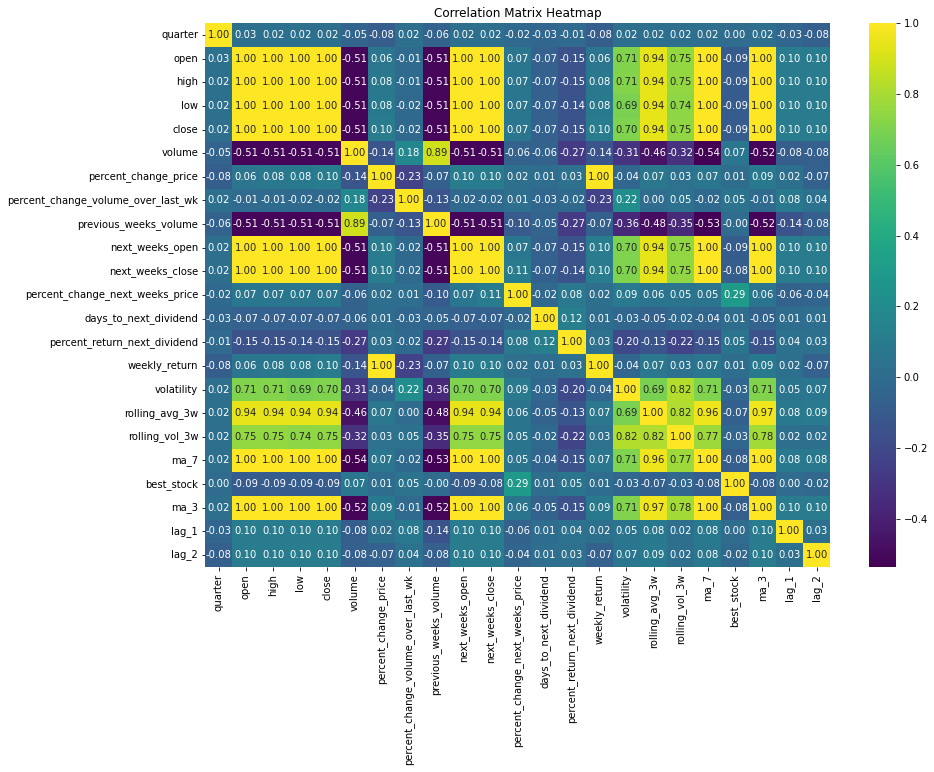

In [148]:
correlation_matrix(df)

In [159]:
df1[['close', 'volume','previous_weeks_volume','volatility','percent_return_next_dividend','percent_change_next_weeks_price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 48 to 424
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   close                            25 non-null     float64
 1   volume                           25 non-null     int64  
 2   ma_3                             23 non-null     float64
 3   volatility                       25 non-null     float64
 4   percent_return_next_dividend     25 non-null     float64
 5   percent_change_next_weeks_price  25 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.4 KB


Step 5: Modeling Approaches
Use multiple models and combine the results (ensemble methods). The previous projects only use Random Forests or basic classifiers.

Time Series Models: Include models like LSTM or Prophet for stock time series forecasting.
Classification Models: Try different classifiers like XGBoost and tune hyperparameters.
Model Stacking: Combine the predictions of multiple models to improve accuracy.
Code for LSTM:

Epoch 1/120
522/522 [==============================] - 11s 7ms/step - loss: 0.0216
Epoch 2/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0118
Epoch 3/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0117
Epoch 4/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0110
Epoch 5/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0108
Epoch 6/120
522/522 [==============================] - 3s 7ms/step - loss: 0.0109
Epoch 7/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0102
Epoch 8/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0105
Epoch 9/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0108
Epoch 10/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0105
Epoch 11/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0099
Epoch 12/120
522/522 [==============================] - 4s 7ms/step - loss: 0.0106
Epoch 13/120

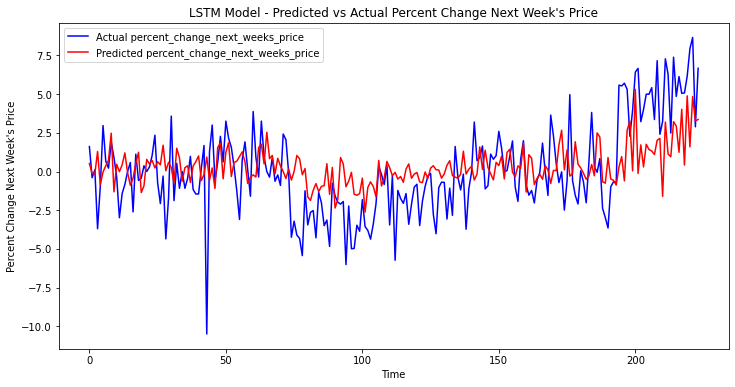

RMSE: 0.10145602598473782


In [204]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

df1 = df.copy()
#df1 = df1[df1.stock == 'CAT']
df1.set_index('date', inplace=True)
df1.sort_index(axis=0,inplace=True)
#df1 = df1[['close','volume','volatility','ma_3','percent_return_next_dividend','percent_change_next_weeks_price']]
df1 = df1[['close','volume','volatility','ma_3','rolling_avg_3w','percent_change_price','previous_weeks_volume','percent_return_next_dividend','percent_change_next_weeks_price']]
df1.fillna(0, inplace=True)

# Preprocessing for LSTM
scaler = MinMaxScaler()
#scaled_data  = scaler.fit_transform(df1[['open', 'high', 'low', 'close', 'volume', 'percent_change_next_weeks_price']])
scaled_data = scaler.fit_transform(df1)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        #X.append(data[i:i+seq_length])
        #y.append(data[i+seq_length][-1])  # Use the 'percent_change_next_weeks_price' as target
        X.append(data[i:i+seq_length][:-1])  # Use the last seq_length data points as input (exclude the target)
        y.append(data[i+seq_length][-1])# Target is 'percent_change_next_weeks_price' (the last column)
    return np.array(X), np.array(y)

seq_length = 4  # E.g., use the last 4 weeks to predict the next week
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=120, batch_size=1, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Invert the scaling of the predicted data (back to original scale)
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred), axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Step 5: Results Analysis - Plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, color='blue', label='Actual percent_change_next_weeks_price')
plt.plot(y_pred_rescaled, color='red', label='Predicted percent_change_next_weeks_price')
plt.title('LSTM Model - Predicted vs Actual Percent Change Next Week\'s Price')
plt.xlabel('Time')
plt.ylabel('Percent Change Next Week\'s Price')
plt.legend()
plt.show()

rmse = np.sqrt(np.mean((y_pred.flatten() - y_test) ** 2))
print('RMSE:', rmse)



In [205]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
rmse = mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False)
print(f'Root Mean Squared Error (MSE): {rmse}')

Root Mean Squared Error (MSE): 2.5673579268271687


c:\Users\p059043\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


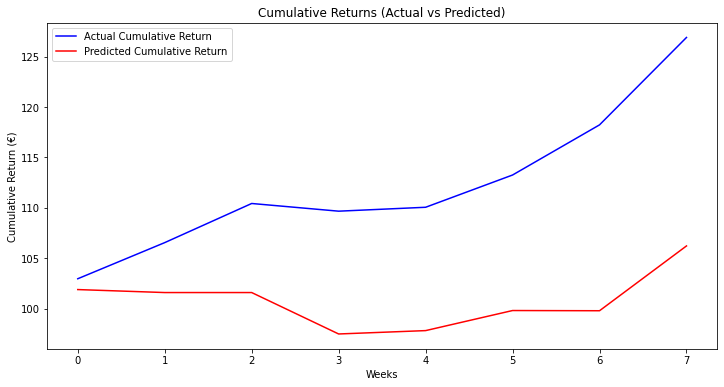

Mean Squared Error (MSE): 9.223245908391156
Final Actual Cumulative Return: 126.89 EUR
Final Predicted Cumulative Return: 106.23 EUR
Percentage of MAX returns acheived: 23.15 %


In [206]:
df2 = df1[train_size:]
df2 = df2[seq_length:]

df2['predicted_change_next_weeks_price'] = y_pred_rescaled

df2['best_actual_stock'] = df2.groupby('date')['percent_change_next_weeks_price'].transform(lambda x: (x == x.max()).astype(int))
df2['best_predicted_stock'] = df2.groupby('date')['predicted_change_next_weeks_price'].transform(lambda x: (x == x.max()).astype(int))

actual_returns_add = df2[df2['best_actual_stock']==1]['percent_change_next_weeks_price'].sum()
predicted_returns_add = df2[df2['best_predicted_stock']==1]['percent_change_next_weeks_price'].sum()

actual_returns_array = df2[df2['best_actual_stock']==1]['percent_change_next_weeks_price'].to_numpy()
predicted_returns_array = df2[df2['best_predicted_stock']==1]['percent_change_next_weeks_price'].to_numpy()

# Cumulative returns for both actual and predicted values (assuming initial investment of 100€)
initial_investment = 100
cumulative_actual_return = np.cumsum(actual_returns_array) * initial_investment / 100 + initial_investment
cumulative_predicted_return = np.cumsum(predicted_returns_array) * initial_investment / 100 + initial_investment

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_actual_return, label='Actual Cumulative Return', color='blue')
plt.plot(cumulative_predicted_return, label='Predicted Cumulative Return', color='red')
plt.title('Cumulative Returns (Actual vs Predicted)')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Return (€)')
plt.legend()
plt.show()

# Step 7: Evaluate model with Mean Squared Error (MSE) as an additional metric
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual_returns_array, predicted_returns_array)
print(f'Mean Squared Error (MSE): {mse}')

# Final cumulative returns
final_actual_return = cumulative_actual_return[-1]
final_predicted_return = cumulative_predicted_return[-1]

print(f"Final Actual Cumulative Return: {final_actual_return:.2f} EUR")
print(f"Final Predicted Cumulative Return: {final_predicted_return:.2f} EUR")
print(f"Percentage of MAX returns acheived: {(100*predicted_returns_add)/actual_returns_add:.2f} %")

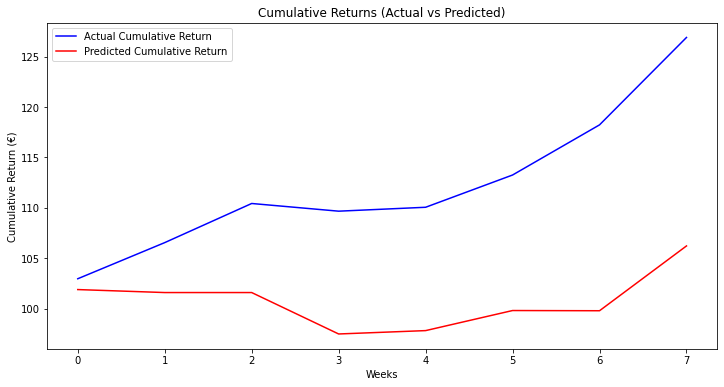

Mean Squared Error (MSE): 9.223245908391156
Root Mean Squared Error (RMSE): 3.036979734603304
Final Actual Cumulative Return: 126.89 EUR
Final Predicted Cumulative Return: 106.23 EUR
Percentage of MAX returns acheived: 23.15 %
[102.97243  106.55398  110.43256  109.670655 110.057909 113.255759
 118.225459 126.888929]
[101.89966   101.604437  101.604437   97.498577   97.832568   99.822438
  99.8017555 106.2259455]


c:\Users\p059043\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [207]:
cumulative_returns(df2)

Step 6: Metrics and Evaluation
Evaluate models with a mix of metrics:

Accuracy for classification.
Return-based metrics: Evaluate how much profit each model would generate if used in real trading.
Improvements:

Provide a custom metric like total weekly return instead of just accuracy.
Code:

python
Copy code

14:11:06 - cmdstanpy - INFO - Chain [1] start processing
14:11:07 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\p059043\AppData\Local\Temp/ipykernel_5288/582991079.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_test['predicted_change_next_weeks_price'] = forecast['yhat_lower'].values
14:11:07 - cmdstanpy - INFO - Chain [1] start processing
14:11:07 - cmdstanpy - INFO - Chain [1] done processing
14:11:07 - cmdstanpy - INFO - Chain [1] start processing
14:11:07 - cmdstanpy - INFO - Chain [1] done processing
14:11:07 - cmdstanpy - INFO - Chain [1] start processing
14:11:07 - cmdstanpy - INFO - Chain [1] done processing
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processi

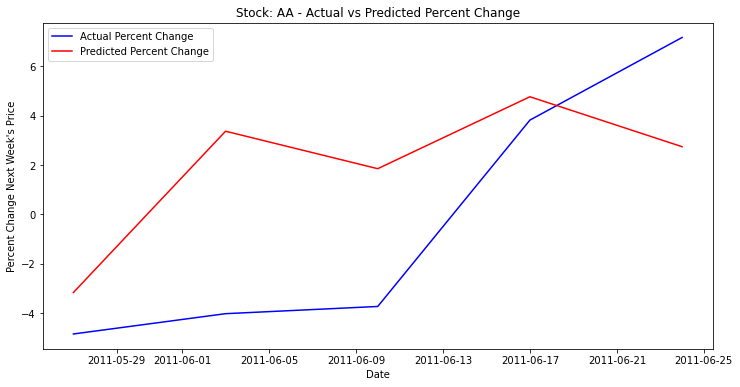

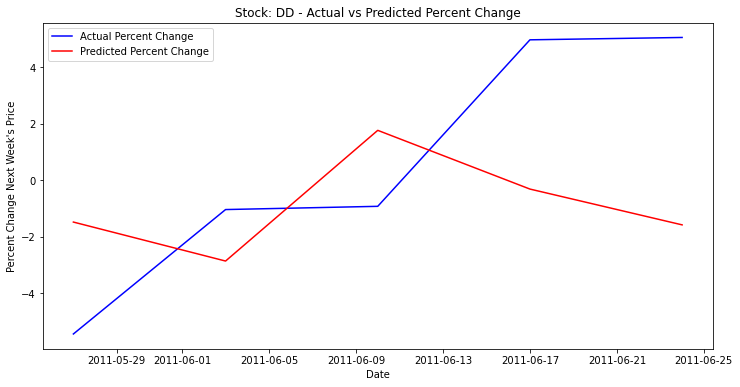

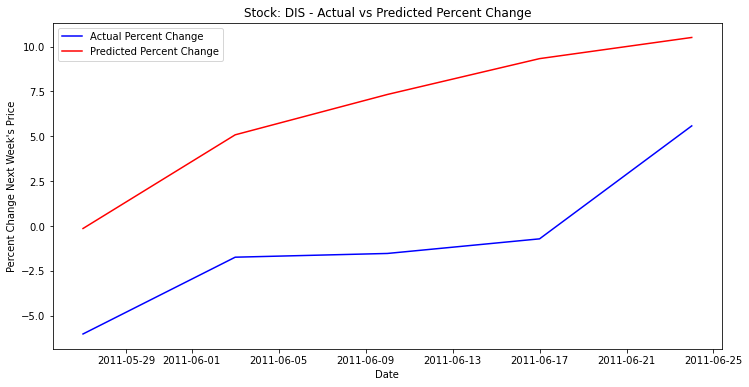

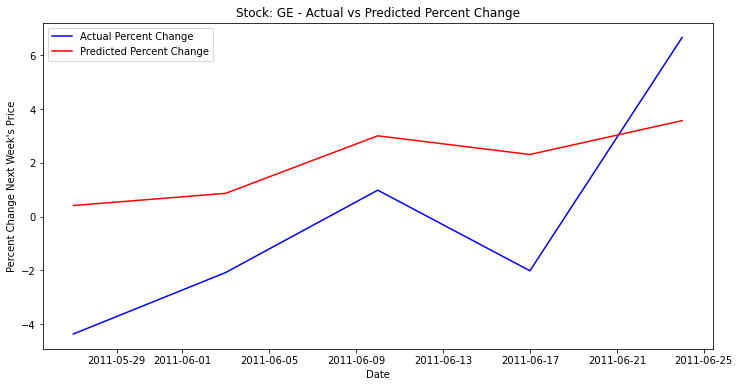

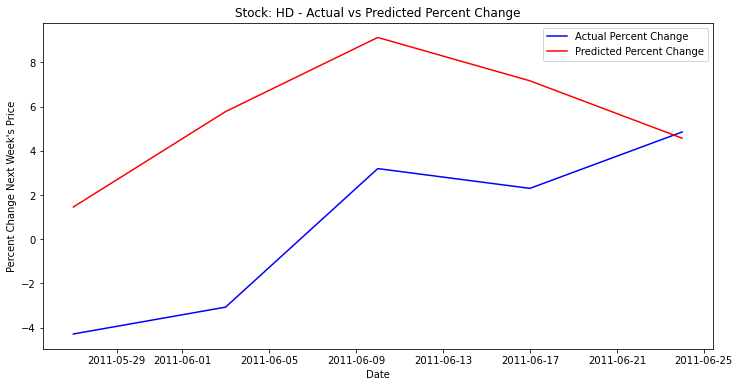

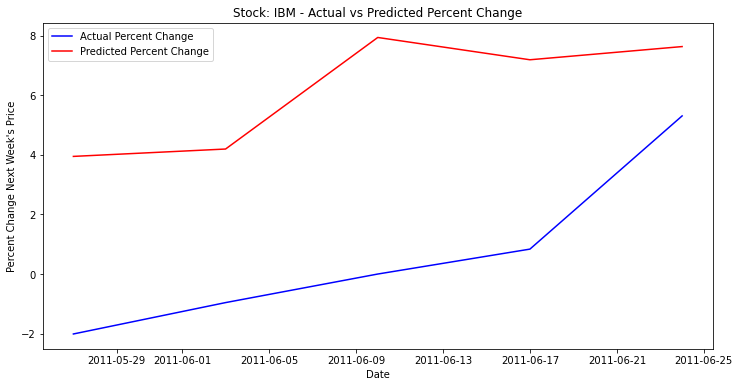

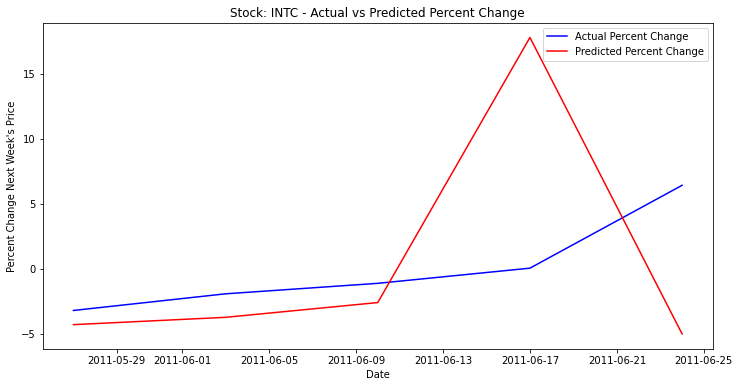

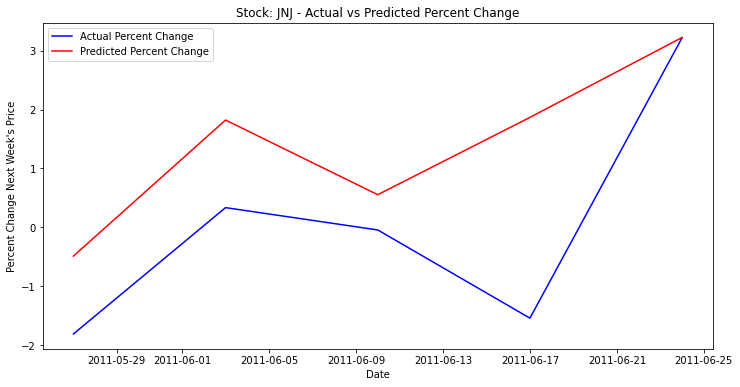

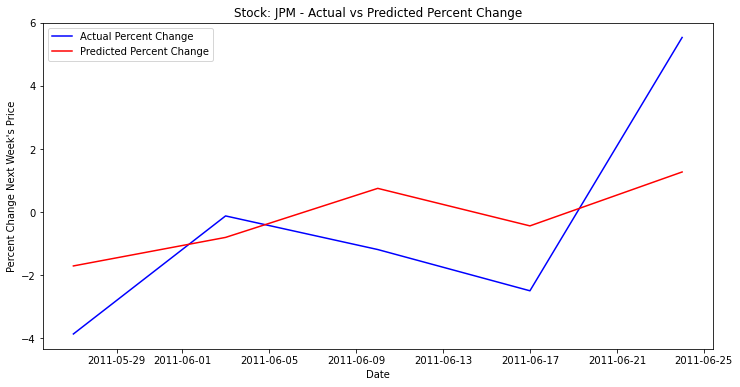

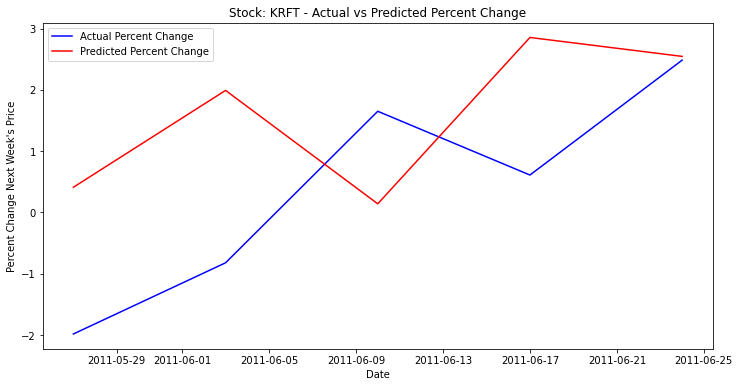

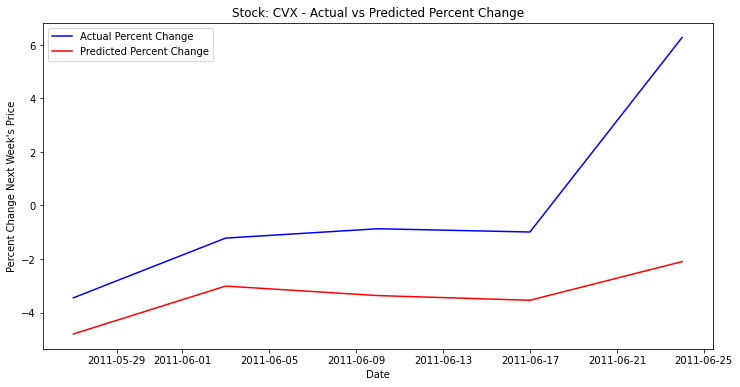

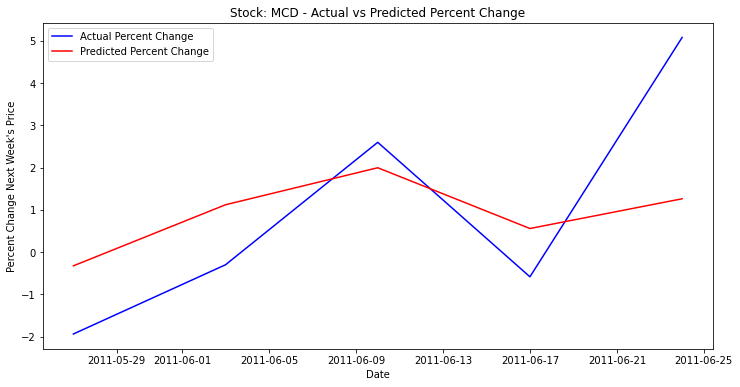

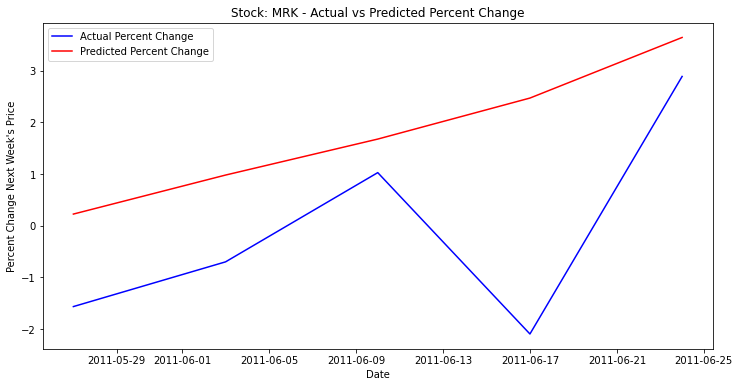

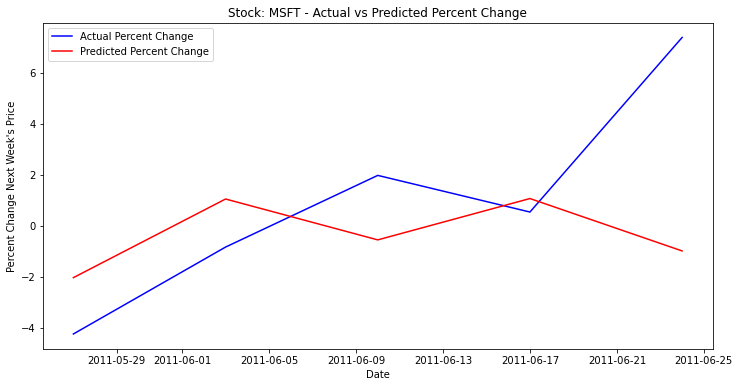

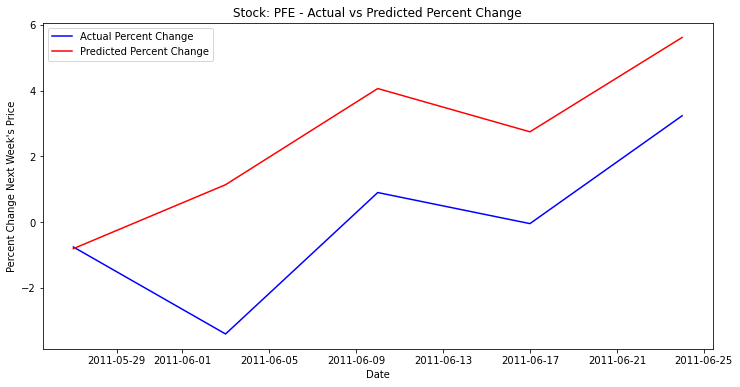

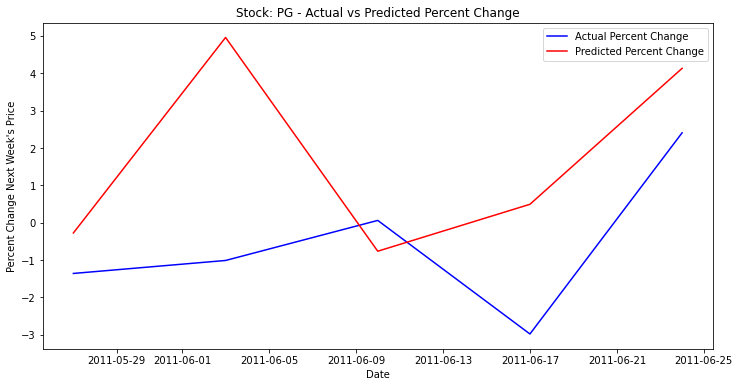

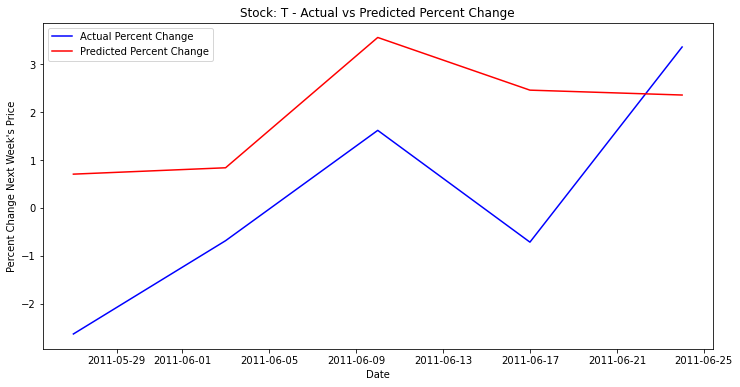

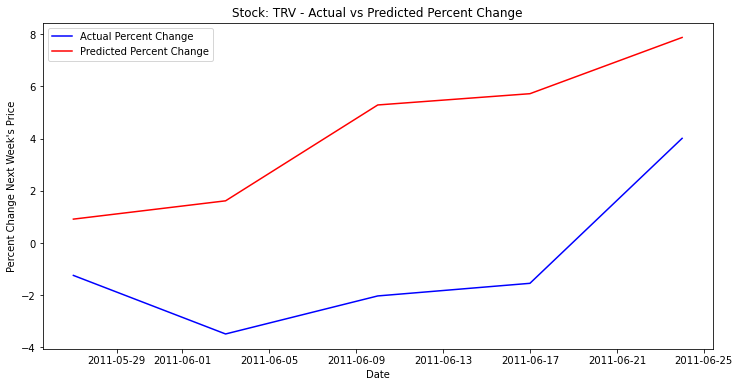

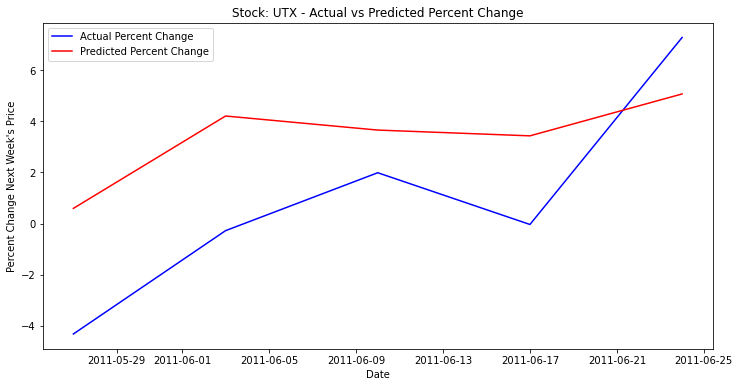

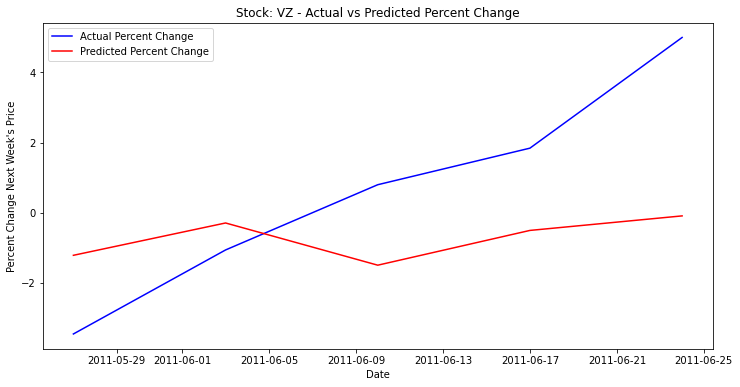

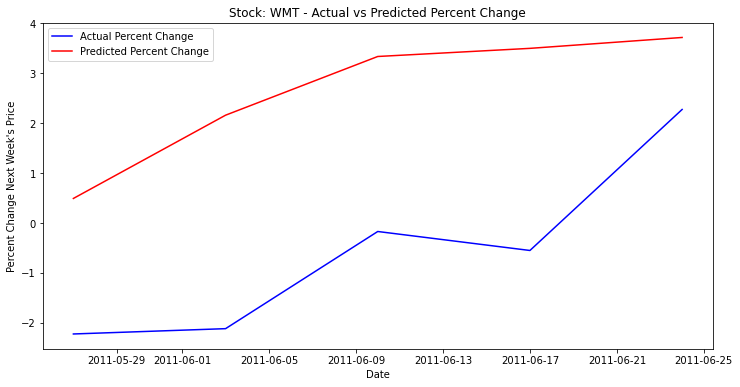

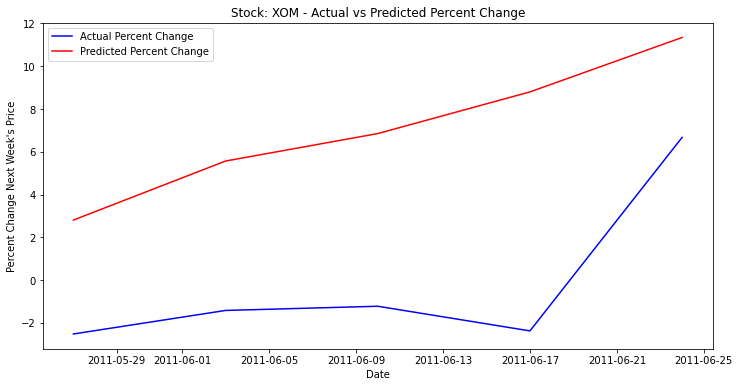

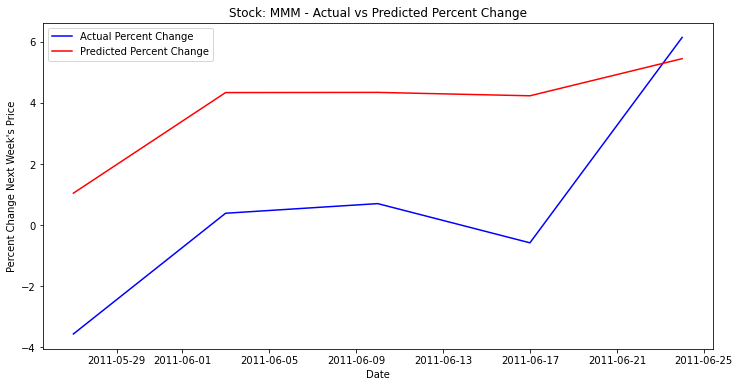

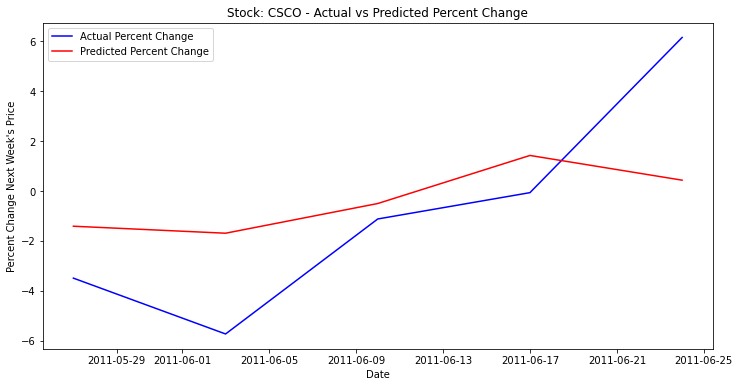

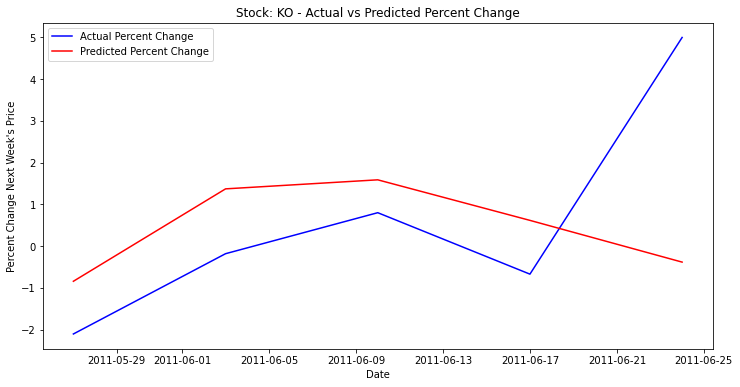

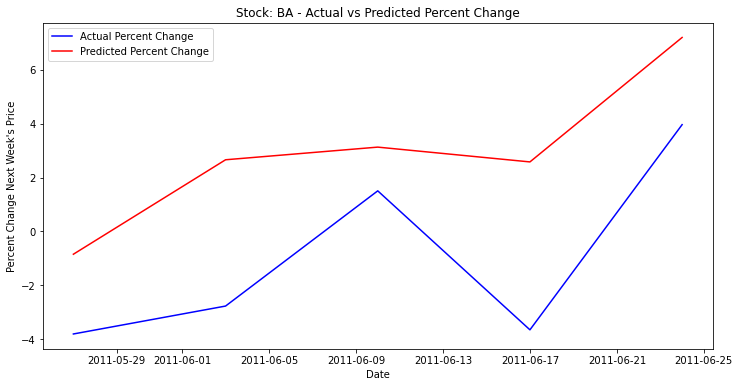

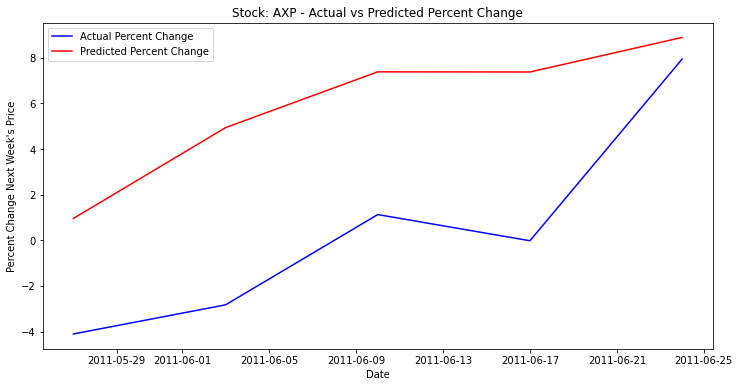

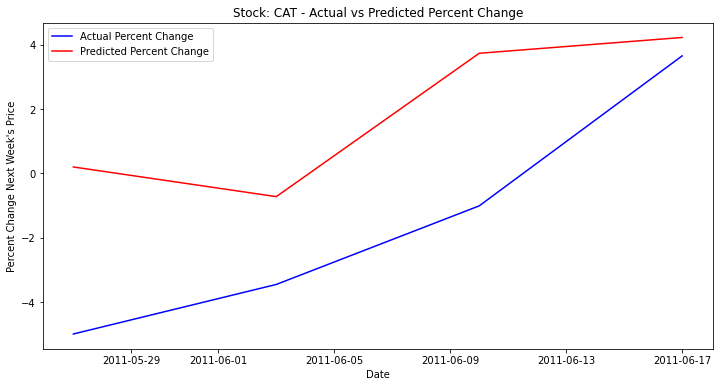

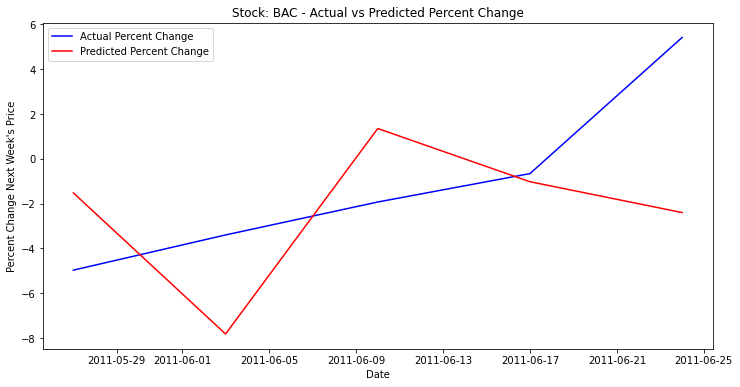

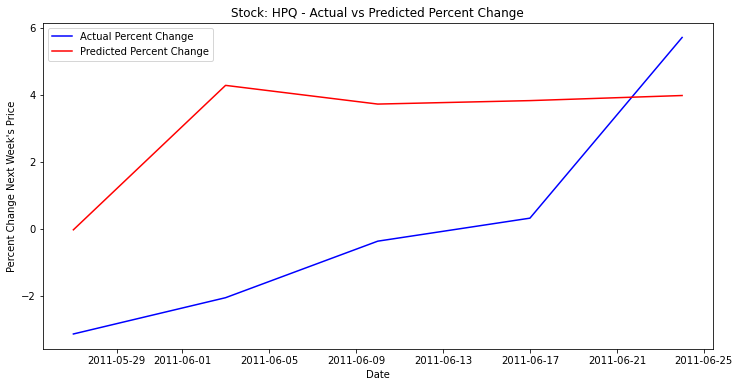

In [222]:
from prophet import Prophet

# Assuming 'data' contains the preprocessed data with 'date', 'stock', and 'percent_change_next_weeks_price'
df1 = df.copy()
df1= df1.dropna()
df1.sort_values(by=['date'], inplace=True)

# Remove extreme outliers based on the percent change
# For example, remove changes greater than 3 standard deviations from the mean
mean_change = df1['percent_change_next_weeks_price'].mean()
std_change = df1['percent_change_next_weeks_price'].std()

# Filter out extreme outliers
df1 = df1[(df1['percent_change_next_weeks_price'] > mean_change - 3 * std_change) &
            (df1['percent_change_next_weeks_price'] < mean_change + 3 * std_change)]

# Step 1: Split the dataset into training and testing (80% train, 20% test)
split_index = int(len(df1) * 0.7)

# Training data is the first 80% of the rows
train_data = df1.iloc[:split_index]

# Testing data is the last 20% of the rows
test_data = df1.iloc[split_index:]

split_date = pd.to_datetime('2011-05-21')

# Split the data into train and test sets
train_data = df1[df1.date < split_date]
test_data = df1[df1.date >= split_date]

# Step 2: Loop over each stock to fit a Prophet model and make predictions
predictions = pd.DataFrame()

for stock in df1['stock'].unique():
    #print(f"Running Prophet model for stock: {stock}")
    
    # Filter data for the current stock
    stock_train = train_data[train_data['stock'] == stock]
    
    stock_test = test_data[test_data['stock'] == stock]
    
    
    # Prepare the data for Prophet
    prophet_data = stock_train[['date', 'percent_change_next_weeks_price','close', 'volatility', 'rolling_avg_3w','lag_1']].copy()
    prophet_data.columns = ['ds', 'y', 'close', 'volatility', 'rolling_avg_3w','lag_1']# Prophet requires 'ds' for date and 'y' for target
    
    # Initialize and fit the Prophet model
    #Prophet has several hyperparameters that you can adjust, such as the seasonality mode and growth rate. By default, Prophet uses additive seasonality, but in financial data, it might be better to switch to multiplicative seasonality since stock returns tend to scale over time.
    model = Prophet(weekly_seasonality=True)
    model.add_regressor('close')
    model.add_regressor('volatility')
    model.add_regressor('rolling_avg_3w')
    model.add_regressor('lag_1')
    model.fit(prophet_data)
    
    # Create a future dataframe to predict for the test set
    future = pd.DataFrame(stock_test[['date', 'close', 'volatility', 'rolling_avg_3w','lag_1']])
    future.columns = ['ds', 'close', 'volatility', 'rolling_avg_3w','lag_1']
    # Make predictions
    forecast = model.predict(future)
   
    # Store the predictions with the stock information
    stock_test['predicted_change_next_weeks_price'] = forecast['yhat_lower'].values
    predictions = pd.concat([predictions, stock_test], axis=0)


# Step 3: Plot the actual vs predicted values for each stock in the test set
for stock in df1['stock'].unique():
    stock_predictions = predictions[predictions['stock'] == stock]
    
    plt.figure(figsize=(12, 6))
    plt.plot(stock_predictions['date'], stock_predictions['percent_change_next_weeks_price'], label='Actual Percent Change', color='blue')
    plt.plot(stock_predictions['date'], stock_predictions['predicted_change_next_weeks_price'], label='Predicted Percent Change', color='red')
    plt.title(f'Stock: {stock} - Actual vs Predicted Percent Change')
    plt.xlabel('Date')
    plt.ylabel('Percent Change Next Week\'s Price')
    plt.legend()
    plt.show()


In [228]:
cc=0
for stock in df1['stock'].unique():
    stock_predictions = predictions[predictions['stock'] == stock]
    mse = mean_squared_error(stock_predictions['percent_change_next_weeks_price'], stock_predictions['predicted_change_next_weeks_price'])
    cc= cc + mse
print(f"Mean Squared Error for stocks: {cc/df1['stock'].unique().shape[0]}")
print(mean_squared_error(stock_predictions['percent_change_next_weeks_price'], stock_predictions['predicted_change_next_weeks_price']))

rmse = root_mean_squared_error(stock_predictions['percent_change_next_weeks_price'], stock_predictions['predicted_change_next_weeks_price'])
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error for stocks: 20.408651552280563
16.356047169168356
Root Mean Squared Error (RMSE): 4.044261016448909


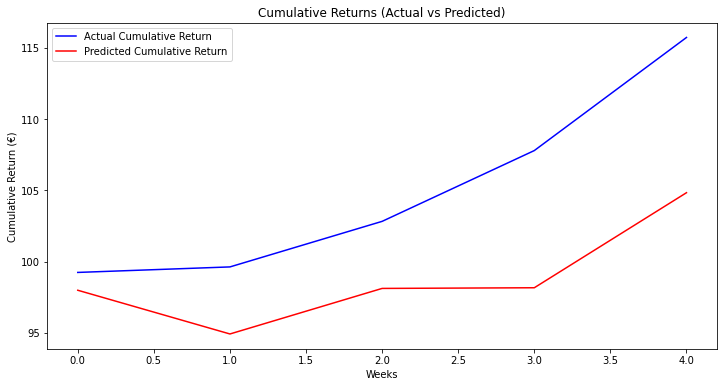

Mean Squared Error (MSE): 7.8703681148646805
Root Mean Squared Error (RMSE): 2.8054176364428667
Final Actual Cumulative Return: 115.73 EUR
Final Predicted Cumulative Return: 104.84 EUR
Percentage of MAX returns acheived: 30.73 %
[ 99.238095  99.625349 102.823199 107.792899 115.732679]
[ 97.98741    94.91762    98.11547    98.1626621 104.8354021]


c:\Users\p059043\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [229]:
predictions.sort_values(by=['date'], inplace=True)
cumulative_returns(predictions)

In [65]:
predictions

quarter stock       date   open    high    low  close     volume  \
549        2   JNJ 2011-05-20  66.41   66.79  65.28  65.69   53385097   
666        2    PG 2011-05-20  66.66   67.72  66.51  67.36   47738539   
588        2    KO 2011-05-20  68.10   68.70  67.50  68.30   32520067   
562        2   JPM 2011-05-20  42.97   44.35  42.65  43.13  145114846   
536        2  INTC 2011-05-20  23.32   23.96  23.08  23.22  387571150   
..       ...   ...        ...    ...     ...    ...    ...        ...   
385        2   AXP 2011-06-24  48.35   50.15  48.15  48.34   34877916   
450        2   CVX 2011-06-24  98.88  102.46  97.00  97.90   42615162   
632        2   MRK 2011-06-24  35.29   35.97  34.50  34.55   63163236   
736        2   WMT 2011-06-24  52.70   53.70  52.35  52.41   75602550   
411        2   BAC 2011-06-24  10.59   10.94  10.48  10.52  603098073   

     percent_change_price  percent_change_volume_over_last_wk  ...  \
549             -1.084170                          -19.163091  ...   
666              1.050100                           -3.902714  ...   
588              0.293686                            1.099511  ...   
562              0.372353                            5.912651  ...   
536             -0.428816                           12.419248  ...   
..                    ...                                 ...  ...   
385             -0.020682                           -7.498820  ...   
450             -0.991100                           -4.972837  ...   
632             -2.096910                            9.027146  ...   
736             -0.550285                            9.574392  ...   
411             -0.661001                          -32.195089  ...   

     volatility  rolling_avg_3w  rolling_vol_3w        ma_7       ma_3  \
549        1.51       65.860000        1.823333   63.912857  65.860000   
666        1.21       66.496667        1.753333   64.820000  66.496667   
588        1.20       67.793333        1.556667   67.714286  67.793333   
562        1.70       43.773333        1.843333   44.765714  43.773333   
536        0.88       23.293333        1.083333   22.037143  23.293333   
..          ...             ...             ...         ...        ...   
385        2.00       48.193333        2.090000   49.381429  48.193333   
450        5.46       98.913333        3.976667  100.844286  98.913333   
632        1.47       35.130000        1.126667   35.937143  35.130000   
736        1.35       52.650000        1.486667   53.902857  52.650000   
411        0.46       10.666667        0.656667   11.211429  10.666667   

        lag_1     lag_2  predicted_change_next_weeks_price  best_actual_stock  \
549  2.319150 -0.986044                           2.270088                  0   
666  2.972430  0.045984                           2.221480                  0   
588  1.974270 -1.269190                           0.711219                  0   
562 -3.575420 -1.959080                          -1.355039                  0   
536  1.210550  0.999131                           3.067514                  0   
..        ...       ...                                ...                ...   
385  1.125940 -2.829230                           3.419707                  0   
450 -0.869652 -1.219030                          -2.446621                  0   
632  1.027690 -0.700280                           0.718109                  0   
736 -0.170100 -2.116600                           6.325174                  0   
411 -1.928370 -3.398930                          -1.396770                  0   

     best_predicted_stock  
549                     0  
666                     0  
588                     0  
562                     0  
536                     1  
..                    ...  
385                     0  
450                     0  
632                     0  
736                     0  
411                     0  

[171 rows x 27 columns]

In [158]:
def cumulative_returns(data):

    data['best_actual_stock'] = data.groupby('date')['percent_change_next_weeks_price'].transform(lambda x: (x == x.max()).astype(int))
    data['best_predicted_stock'] = data.groupby('date')['predicted_change_next_weeks_price'].transform(lambda x: (x == x.max()).astype(int))

    actual_returns_add = data[data['best_actual_stock']==1]['percent_change_next_weeks_price'].sum()
    predicted_returns_add = data[data['best_predicted_stock']==1]['percent_change_next_weeks_price'].sum()

    actual_returns_array = data[data['best_actual_stock']==1]['percent_change_next_weeks_price'].to_numpy()
    predicted_returns_array = data[data['best_predicted_stock']==1]['percent_change_next_weeks_price'].to_numpy()

    # Cumulative returns for both actual and predicted values (assuming initial investment of 100€)
    initial_investment = 100
    cumulative_actual_return = np.cumsum(actual_returns_array) * initial_investment / 100 + initial_investment
    cumulative_predicted_return = np.cumsum(predicted_returns_array) * initial_investment / 100 + initial_investment

    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_actual_return, label='Actual Cumulative Return', color='blue')
    plt.plot(cumulative_predicted_return, label='Predicted Cumulative Return', color='red')
    plt.title('Cumulative Returns (Actual vs Predicted)')
    plt.xlabel('Weeks')
    plt.ylabel('Cumulative Return (€)')
    plt.legend()
    plt.show()

    # Step 7: Evaluate model with Mean Squared Error (MSE) as an additional metric
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(actual_returns_array, predicted_returns_array)
    print(f'Mean Squared Error (MSE): {mse}')
    rmse = mean_squared_error(actual_returns_array, predicted_returns_array, squared=False)
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # Final cumulative returns
    final_actual_return = cumulative_actual_return[-1]
    final_predicted_return = cumulative_predicted_return[-1]

    print(f"Final Actual Cumulative Return: {final_actual_return:.2f} EUR")
    print(f"Final Predicted Cumulative Return: {final_predicted_return:.2f} EUR")
    print(f"Percentage of MAX returns acheived: {(100*predicted_returns_add)/actual_returns_add:.2f} %")

    print(cumulative_actual_return)

    print(cumulative_predicted_return)

In [58]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using Augmented Dickey-Fuller Test (ADF Test)
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary; differencing is needed.")

# Check stationarity of 'percent_change_next_weeks_price'
adf_test(df['percent_change_next_weeks_price'])

AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
# Differencing the series to make it stationary
df['diff_percent_change'] = df['percent_change_next_weeks_price'].diff().dropna()

# Check stationarity after differencing
adf_test(df['diff_percent_change'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Step 2: Fit the ARIMA model
# (p, d, q) parameters - you can experiment with different values
model = ARIMA(df['percent_change_next_weeks_price'], order=(5, 1, 0))  # AR(5), I(1), MA(0)
model_fit = model.fit(disp=0)

# Print model summary
print(model_fit.summary())

In [ ]:
# Step 3: Predict next 10 weeks
forecast, stderr, conf_int = model_fit.forecast(steps=10)

# Display the forecasted values
print(f"Forecasted Percent Change Next Week's Price: {forecast}")

In [ ]:
# Plot the actual vs forecasted percent change
plt.figure(figsize=(12, 6))
plt.plot(df['percent_change_next_weeks_price'][-50:], label="Actual Price Change", color='blue')
plt.plot(pd.date_range(df['date'].iloc[-1], periods=10, freq='W'), forecast, label="Forecasted Price Change", color='red')
plt.fill_between(pd.date_range(df['date'].iloc[-1], periods=10, freq='W'), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA Model - Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Percent Change Next Week\'s Price')
plt.show()